# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
np.random.seed(306)

In [6]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [8]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels, random_state=42)

In [10]:
train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)

# SGDRegressor

* SGDRegressor you can specify a loss function and it uses Stochastic Gradient Descent (SGD) to fit.
*  For SGD you run the training set one data point at a time and update the parameters according to the error gradient.
*  In simple words - you can train SGDRegressor on the training dataset, that does not fit into RAM.
*  Also, you can update the SGDRegressor model with a new batch of data without retraining on the whole dataset.
*  SGD is sensitivev to feature scaling

In [21]:
sgd = SGDRegressor(random_state = 42)
sgd.fit(train_features , train_labels)

train_mae = mean_absolute_error(train_labels , sgd.predict(train_features))
dev_mae = mean_absolute_error(dev_labels , sgd.predict(dev_features))

print("Mean absolute Errors on Training Set : ", train_mae)
print("Mean absolute Errors on Development Set : ", dev_mae)

Mean absolute Errors on Training Set :  309190327803747.2
Mean absolute Errors on Development Set :  311959782899622.1


*  The mean absolute error is too high.
*  The baseline model does not train well. This may happen due to large learning rate.
*  Train the model step by step and record training loss in each step to find the issue

# Adding Feature Scaling

In [30]:
sgd_pipe = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('SGD',SGDRegressor())
])
sgd_pipe.fit(train_features , train_labels)

train_mae = mean_absolute_error(train_labels , sgd_pipe.predict(train_features))
dev_mae = mean_absolute_error(dev_labels , sgd_pipe.predict(dev_features))

print("Mean absolute Errors on Training Set : ", train_mae)
print("Mean absolute Errors on Development Set : ", dev_mae)

Mean absolute Errors on Training Set :  0.7120658904697419
Mean absolute Errors on Development Set :  0.9804229242073539


The error is still high, let's run SGDRegressor step by step and investigate issues with training.

# Step-wise training of SGDRegressor

* STEP 1: Instantiate SGDRegressor with warm_start=True and tol=-np.infty.* 
STEP 2: Train SGD step by step and record regression loss in each step.* 
STEP 3: Plot learning curves and see if there are any issues in training.

C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\L

Text(0.5, 1.0, 'Learning curve: eta0=0.0100')

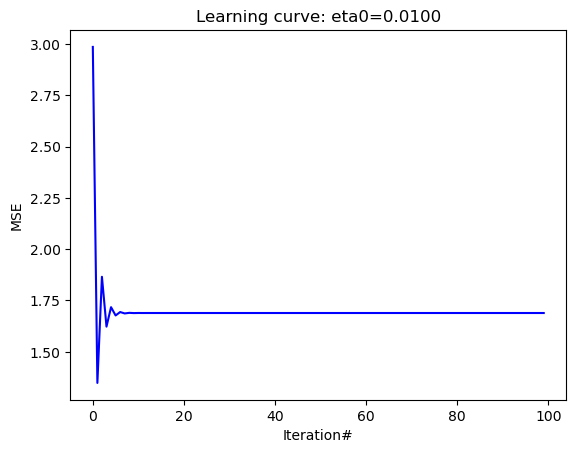

In [61]:
eta0 = 1e-2
sgd_pipeline = Pipeline([
    ("feature_scaling",StandardScaler()),
    ("SGD", SGDRegressor(max_iter = 1 , tol = eta0,
                         warm_start = True , random_state = 42))
     ])

loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features , train_labels) # continues where it left off
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0:.4f}')

The loss reduced initialy and then increased. This could be due to large learning rates. We will reduce the learning rate by a factor of 10 and retry the training.

C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SUDARKODI S\anaconda3\L

Text(0.5, 1.0, 'Learning curve: eta0=0.0010')

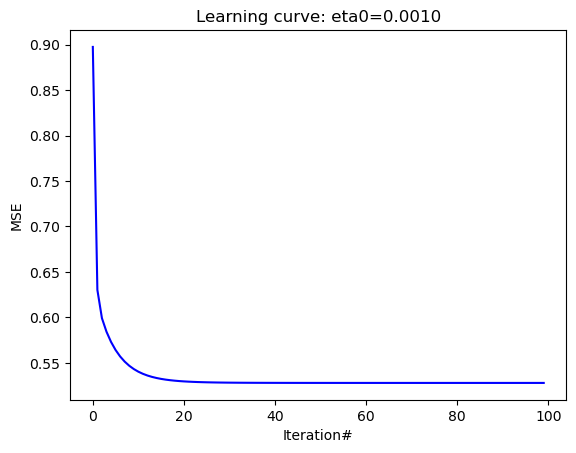

In [66]:
eta0 = 1e-3
sgd_pipeline = Pipeline([
    ("feature_scaling",StandardScaler()),
    ("SGD", SGDRegressor(max_iter = 1 , eta0 = eta0,
                         warm_start = True , random_state = 42))
     ])

loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features , train_labels) # continues where it left off
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0:.4f}')

This is an ideal learning curve where the train loss reduces monotonically as the training progresses.

In [77]:
print("Iteration before reaching convergence criteria: " , sgd_pipeline[-1].n_iter_)
print("Weight updates:  " , sgd_pipeline[-1].t_)


Iteration before reaching convergence criteria:  1
Weight updates:   11611.0


In [79]:
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print ("Mean absolute error on Training set: ", train_mae)
print ("Mean absolute error on development set: ", dev_mae)

Mean absolute error on Training set:  0.5333732983042573
Mean absolute error on development set:  0.5190150280908042
